In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk

from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Набор данных взят с https://www.kaggle.com/aungpyaeap/fish-market
# Параметры нескольких популярных промысловых рыб
# length 1 = Body height
# length 2 = Total Length
# length 3 = Diagonal Length
fish_data = pd.read_csv("datasets/Fish.csv", delimiter=',')
print(fish_data)

    Species  Weight  Length1  Length2  Length3   Height   Width
0     Bream   242.0     23.2     25.4     30.0  11.5200  4.0200
1     Bream   290.0     24.0     26.3     31.2  12.4800  4.3056
2     Bream   340.0     23.9     26.5     31.1  12.3778  4.6961
3     Bream   363.0     26.3     29.0     33.5  12.7300  4.4555
4     Bream   430.0     26.5     29.0     34.0  12.4440  5.1340
..      ...     ...      ...      ...      ...      ...     ...
154   Smelt    12.2     11.5     12.2     13.4   2.0904  1.3936
155   Smelt    13.4     11.7     12.4     13.5   2.4300  1.2690
156   Smelt    12.2     12.1     13.0     13.8   2.2770  1.2558
157   Smelt    19.7     13.2     14.3     15.2   2.8728  2.0672
158   Smelt    19.9     13.8     15.0     16.2   2.9322  1.8792

[159 rows x 7 columns]


In [3]:
# Выделим две переменных
x_label = 'Length1'
y_label = 'Weight'
data = fish_data[[x_label, y_label]]
print(data)

     Length1  Weight
0       23.2   242.0
1       24.0   290.0
2       23.9   340.0
3       26.3   363.0
4       26.5   430.0
..       ...     ...
154     11.5    12.2
155     11.7    13.4
156     12.1    12.2
157     13.2    19.7
158     13.8    19.9

[159 rows x 2 columns]


In [4]:
# Определим размер валидационной и тестовой выборок
val_test_size = round(0.2*len(data))
print(val_test_size)

32


In [5]:
# Генерируем уникальный seed
my_code = "Колян"
seed_limit = 2 ** 32
my_seed = int.from_bytes(my_code.encode(), "little") % seed_limit

In [6]:
# Создадим обучающую, валидационную и тестовую выборки
random_state = my_seed
train_val, test = train_test_split(data, test_size=val_test_size, random_state=random_state)
train, val = train_test_split(train_val, test_size=val_test_size, random_state=random_state)
print(len(train), len(val), len(test))

95 32 32


In [7]:
# Преобразуем данные к ожидаемому библиотекой skleran формату
train_x = np.array(train[x_label]).reshape(-1,1)
train_y = np.array(train[y_label]).reshape(-1,1)

val_x = np.array(val[x_label]).reshape(-1,1)
val_y = np.array(val[y_label]).reshape(-1,1)

test_x = np.array(test[x_label]).reshape(-1,1)
test_y = np.array(test[y_label]).reshape(-1,1)

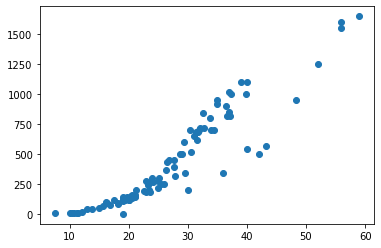

In [8]:
# Нарисуем график
plt.plot(train_x, train_y, 'o')
plt.show()

In [9]:
# Создадим модель линейной регрессии и обучим ее на обучающей выборке.
model1 = linear_model.LinearRegression()
model1.fit(train_x, train_y)

LinearRegression()

In [10]:
# Результат обучения:  значения a и b: y = ax+b
print(model1.coef_, model1.intercept_)

a = model1.coef_[0]
b = model1.intercept_
print(a, b)

[[34.38649032]] [-500.78370154]
[34.38649032] [-500.78370154]


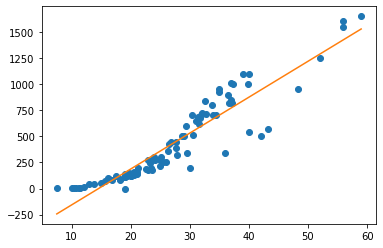

In [11]:
# Добавим полученную линию на график
x = np.linspace(min(train_x), max(train_x), 100)
y = a * x + b

plt.plot(train_x, train_y, 'o')
plt.plot(x, y)
plt.show()

In [12]:
# Проверим результат на валидационной выборке
val_predicted = model1.predict(val_x)
mse1 = mean_squared_error(val_y, val_predicted)
print(mse1)

32293.15285756066


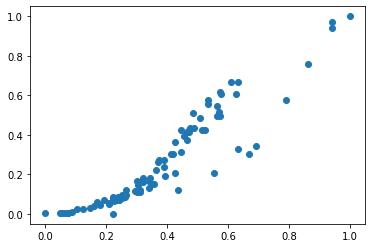

In [13]:
# Результат не очень хорош для интерпретации, попробуем сначала нормировать значения
scaler_x = MinMaxScaler()
scaler_x.fit(train_x)
scaled_train_x = scaler_x.transform(train_x)

scaler_y = MinMaxScaler()
scaler_y.fit(train_y)
scaled_train_y = scaler_y.transform(train_y)

plt.plot(scaled_train_x, scaled_train_y, 'o')
plt.show()

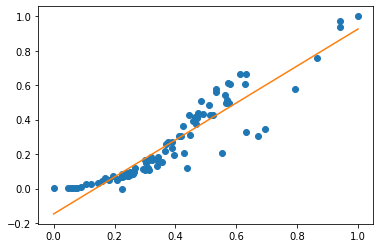

In [14]:
# Строим модель и выводим результаты для нормированных данных
model2 = linear_model.LinearRegression()
model2.fit(scaled_train_x, scaled_train_y)
a = model2.coef_[0]
b = model2.intercept_

x = np.linspace(min(scaled_train_x), max(scaled_train_x), 100)
y = a * x + b

plt.plot(scaled_train_x, scaled_train_y, 'o')
plt.plot(x, y)
plt.show()

In [15]:
# Проверим результат на валидационной выборке
scaled_val_x = scaler_x.transform(val_x)
scaled_val_y = scaler_y.transform(val_y)

val_predicted = model2.predict(scaled_val_x)

mse2 = mean_squared_error(scaled_val_y, val_predicted)
print(mse2)

0.011861580480279393


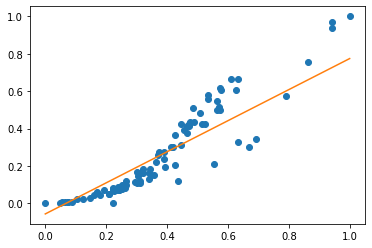

In [16]:
# Построим модель линейной регресси с L1-регуляризацией и выведем результаты для нормированных данных.
model3 = linear_model.Lasso(alpha=0.01)
model3.fit(scaled_train_x, scaled_train_y)
a = model3.coef_[0]
b = model3.intercept_

x = np.linspace(min(scaled_train_x), max(scaled_train_x), 100)
y = a * x + b

plt.plot(scaled_train_x, scaled_train_y, 'o')
plt.plot(x, y)
plt.show()

In [17]:
# Проверим результат на валидационной выборке
scaled_val_x = scaler_x.transform(val_x)
scaled_val_y = scaler_y.transform(val_y)

val_predicted = model3.predict(scaled_val_x)

mse3 = mean_squared_error(scaled_val_y, val_predicted)
print(mse3)
# Можете поэкспериментировать со значением параметра alpha, чтобы уменьшить ошибку

0.010844863858305439


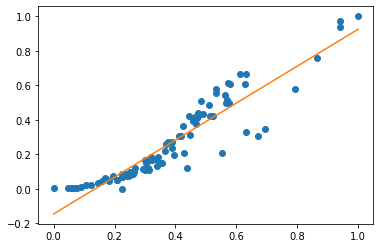

In [18]:
# Построим модель линейной регресси с L2-регуляризацией и выведем результаты для нормированных данных
model4 = linear_model.Ridge(alpha=0.01)
model4.fit(scaled_train_x, scaled_train_y)
a = model4.coef_[0]
b = model4.intercept_

x = np.linspace(min(scaled_train_x), max(scaled_train_x), 100)
y = a * x + b

plt.plot(scaled_train_x, scaled_train_y, 'o')
plt.plot(x, y)
plt.show()

In [19]:
# Проверим результат на валидационной выборке
scaled_val_x = scaler_x.transform(val_x)
scaled_val_y = scaler_y.transform(val_y)

val_predicted = model4.predict(scaled_val_x)

mse4 = mean_squared_error(scaled_val_y, val_predicted)
print(mse4)
# Можете поэкспериментировать со значением параметра alpha, чтобы уменьшить ошибку

0.01183079653516104


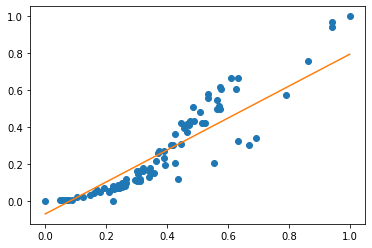

In [20]:
# Построим модель линейной регресси с ElasticNet-регуляризацией и выведем результаты для нормированных данных
model5 = linear_model.ElasticNet(alpha=0.01, l1_ratio = 0.01)
model5.fit(scaled_train_x, scaled_train_y)
a = model5.coef_[0]
b = model5.intercept_

x = np.linspace(min(scaled_train_x), max(scaled_train_x), 100)
y = a * x + b

plt.plot(scaled_train_x, scaled_train_y, 'o')
plt.plot(x, y)
plt.show()

In [21]:
# Проверим результат на валидационной выборке
scaled_val_x = scaler_x.transform(val_x)
scaled_val_y = scaler_y.transform(val_y)

val_predicted = model5.predict(scaled_val_x)

mse5 = mean_squared_error(scaled_val_y, val_predicted)
print(mse5)
# Можете поэкспериментировать со значениями параметров alpha и l1_ratio, чтобы уменьшить ошибку

0.010779424155589985


In [22]:
# Выведем ошибки для моделей на нормированных данных
print(mse2, mse3, mse4, mse5)

0.011861580480279393 0.010844863858305439 0.01183079653516104 0.010779424155589985


In [23]:
# Минимальное значение достигается для второй модели, получим итоговую величину ошибки на тестовой выборке
scaled_test_x = scaler_x.transform(test_x)
scaled_test_y = scaler_y.transform(test_y)

test_predicted = model2.predict(scaled_test_x)

mse_test = mean_squared_error(scaled_test_y, test_predicted)
print(mse_test)

0.004814634766474867


In [24]:
# Повторите выделение данных, нормирование, и анализ 4 моделей
# (обычная линейная регрессия, L1-регуляризация, L2-регуляризация, ElasticNet-регуляризация)
# для x = Length2 и y = Width.